# Welcome to Jupyter!

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [43]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

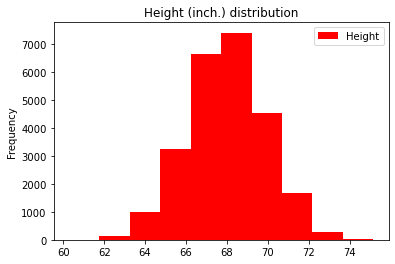

In [44]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [45]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:title={'center':'Weight (f.) distribution'}, ylabel='Frequency'>

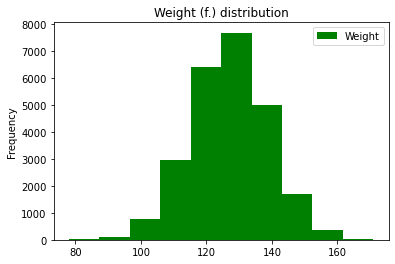

In [46]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (f.) distribution')

In [47]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [48]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

In [49]:
sns.pairplot(data)

NameError: name 'sns' is not defined

In [50]:
def weight_category(weight):
    pass
    if weight<120:
        return 1
    elif weight >=150:
        return 3
    else:
        return 2
   
data['weight_category'] = data['Weight'].apply(weight_category)
sns.boxplot(data=data, x="weight_category", y="Height").set(xlabel = u"Весовая категория", ylabel = u"Рост")

NameError: name 'sns' is not defined

<AxesSubplot:title={'center':'Height from weight depending'}, xlabel='Weight', ylabel='Height'>

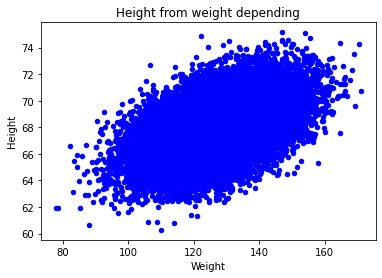

In [51]:
data.plot(y='Height', x='Weight', kind='scatter', color='blue',  title='Height from weight depending')

In [52]:
def error(w0, w1):
    er=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
     er+=(y[i]-w0-w1*x[i])**2
    return er

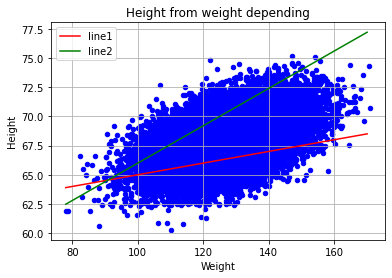

In [53]:
x = np.linspace(start = int(np.amin(data['Weight'])), stop = int(np.amax(data['Weight'])), num = 100)

w0,w1=60,0.05
y1 = [w0+t*w1 for t in x]

w0,w1=50,0.16
y2 = [w0+t*w1 for t in x]

data.plot(y='Height', x='Weight', kind='scatter', color='blue', title='Height from weight depending')

plt.plot(x, y1, color="red", label="line1")
plt.plot(x, y2, color="green", label="line2")
plt.grid(True)
plt.legend(loc='upper left')

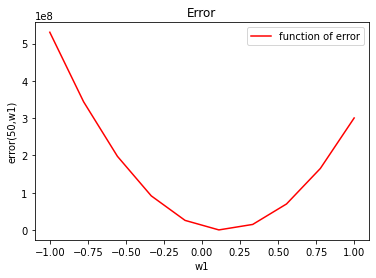

In [54]:
w = np.linspace(start = -1., stop = 1., num = 10)

err = [error(50.,w1) for w1 in w]
plt.title('Error')
plt.xlabel('w1')
plt.ylabel('error(50,w1)')

plt.plot(w, err, color="red", label="function of error")
plt.legend()

In [55]:
import scipy
from scipy.optimize import minimize_scalar

def error50(w1):
    return error(50,w1)

min=minimize_scalar(error50, bounds=(-5,5), method='bounded')
w1_opt=min.x
min.x, min.fun

(0.14109165115062905, 79510.63244004796)

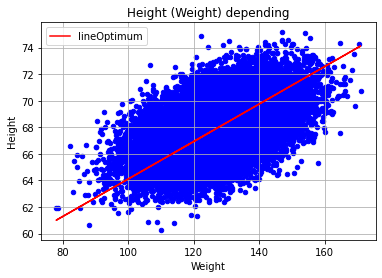

In [56]:
x=np.array(data['Weight'])

w0,w1=50,w1_opt
y = [w0+t*w1 for t in x]

#xx = np.linspace(np.min(data['Weight']),np.max(data['Weight']),data.count)
data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')

In [57]:
from mpl_toolkits.mplot3d import Axes3D

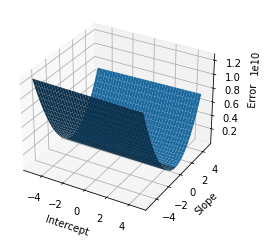

In [59]:
fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(w0, w1)
E = error(W0,W1)

surf = ax.plot_surface(W0, W1, E)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [63]:
def error1(w):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
min = optimize.minimize(error1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))

min.x, min.fun

(array([57.57168299,  0.08200689]), 67544.15205622964)

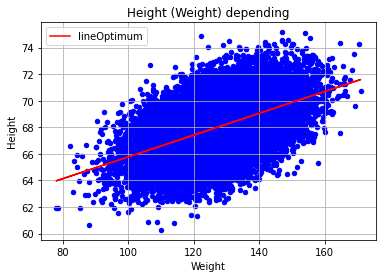

In [62]:
x=np.array(data['Weight'])

w0,w1=min.x
y = [w0+t*w1 for t in x]

data.plot(y='Height', x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')